#  Algorithms Assessment

Using [this](https://github.com/abreukuse/ml_utilities/blob/master/algorithms_assessment.py) python module you can make quick assessments about the performance of machine learning algorithms. 
There´s two classes in it. One is `ValidationCurves` with which is possible to analyze how a specific model behaves regarding changes in some hyperparameter. The other one is the `LeaningCurves`, and with this one you can look at the performance regarding a increasing sample size.

In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from algorithms_assessment import ValidationCurves, LearningCurves

In [2]:
cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

target_names = {0: 'malignant',
               1: 'benign'}
df.target.replace(target_names, inplace=True)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Validation Curves

In [5]:
# The hyperparameter 'C' will be analysed
model = LogisticRegression(C=None, random_state=60)
hyperparameters = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [6]:
assessment = ValidationCurves(X, y,
                              estimator=model,
                              hyperparameter='C',
                              metric='accuracy',
                              validation=2)

C  =  0.001
Train: 0.954 | Validation: 0.923

C  =  0.01
Train: 0.944 | Validation: 0.924

C  =  0.1
Train: 0.953 | Validation: 0.923

C  =  1
Train: 0.956 | Validation: 0.93

C  =  10
Train: 0.953 | Validation: 0.94

C  =  100
Train: 0.967 | Validation: 0.953

C  =  1000
Train: 0.953 | Validation: 0.942



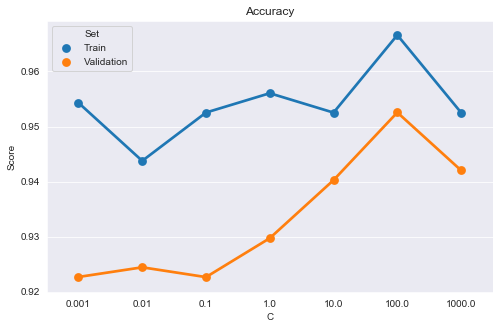

In [7]:
assessment.validation_curves(param_values=hyperparameters)

C  =  0.001
Train: 0.954 | Validation: 0.923

C  =  0.01
Train: 0.944 | Validation: 0.924

C  =  0.1
Train: 0.953 | Validation: 0.923

C  =  1
Train: 0.956 | Validation: 0.93

C  =  10
Train: 0.953 | Validation: 0.94

C  =  100
Train: 0.967 | Validation: 0.953

C  =  1000
Train: 0.953 | Validation: 0.942



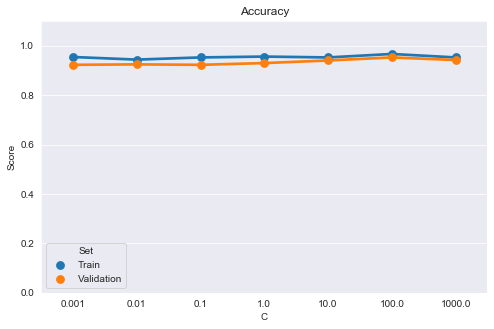

In [8]:
# The scale of the plot can be changed
assessment.validation_curves(param_values=hyperparameters, ylim=(0,1.1))

In [9]:
# And the table result can be accessed
assessment.table

,C,Train,Validation
0,0.001,0.954312,0.922683
1,0.010,0.943767,0.924438
2,0.100,0.952539,0.922659
3,1.000,0.956048,0.929726
4,10.000,0.952527,0.940271
5,100.000,0.966605,0.952557
6,1000.000,0.952527,0.942037


In [10]:
# Testing a decision tree with recall as the metric

depths = [3,5,7,9,11,13,15]
tree = DecisionTreeClassifier(max_depth=None)

recall = make_scorer(recall_score, average='binary', pos_label='benign')

In [11]:
assessment_decision_tree = ValidationCurves(X, y, 
                                            estimator=tree, 
                                            hyperparameter='max_depth',
                                            metric=recall,
                                            validation=2,
                                            metric_name='recall')

max_depth  =  3
Train: 0.992 | Validation: 0.944

max_depth  =  5
Train: 1.0 | Validation: 0.941

max_depth  =  7
Train: 1.0 | Validation: 0.91

max_depth  =  9
Train: 1.0 | Validation: 0.927

max_depth  =  11
Train: 1.0 | Validation: 0.933

max_depth  =  13
Train: 1.0 | Validation: 0.91

max_depth  =  15
Train: 1.0 | Validation: 0.899



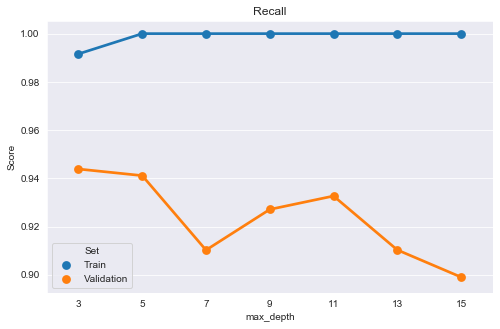

In [12]:
assessment_decision_tree.validation_curves(param_values = depths)

In [13]:
assessment_decision_tree.table

,max_depth,Train,Validation
0,3,0.991589,0.943852
1,5,1.000000,0.941121
2,7,1.000000,0.910238
3,9,1.000000,0.927108
4,11,1.000000,0.932663
5,13,1.000000,0.910301
6,15,1.000000,0.899033


## Learning Curves

In [14]:
tree = DecisionTreeClassifier(max_depth=3, random_state=40)

In [15]:
learning = LearningCurves(X, y, 
                          estimator=tree, 
                          validation=2, 
                          metric='accuracy', 
                          step_size=50, 
                          shuffle=True)

Samples: 50
Train: 1.0 | Validation: 0.78

Samples: 100
Train: 1.0 | Validation: 0.91

Samples: 150
Train: 1.0 | Validation: 0.873

Samples: 200
Train: 0.99 | Validation: 0.88

Samples: 250
Train: 0.984 | Validation: 0.92

Samples: 300
Train: 0.977 | Validation: 0.937

Samples: 350
Train: 0.986 | Validation: 0.923

Samples: 400
Train: 0.978 | Validation: 0.905

Samples: 450
Train: 0.978 | Validation: 0.924

Samples: 500
Train: 0.976 | Validation: 0.944

Samples: 550
Train: 0.978 | Validation: 0.947



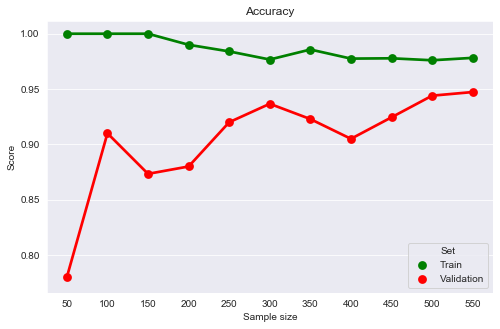

In [16]:
learning.learning_curves()

In [17]:
learning.table

,Sample size,Train,Validation
0,50,1.000000,0.780000
1,100,1.000000,0.910000
2,150,1.000000,0.873333
3,200,0.990000,0.880000
4,250,0.984000,0.920000
5,300,0.976667,0.936667
6,350,0.985714,0.922857
7,400,0.977500,0.905000
8,450,0.977778,0.924444
9,500,0.976000,0.944000
